In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
#modelo que se usará
def recta(x,param):
    return param[0]*x+param[1]

#Logaritmo natural del likelihood
def lnl(datos,modelo,param):
    return -1/2*np.sum(((datos[1]-modelo(datos[0],param))/datos[2])**2)

def montecarlo(datos,modelo,desvp,pold,it,maxit):
    '''
    datos: matriz que guarda los datos experimentales x, y y desviación de y
    modelo: modelo que se quiere ajustar a los datos
    desvp: desviación de distribución de la vecindad donde se buscarán nuevos puntos para iterar
    pold: primera aproximación
    it: puntos aceptados deseados
    maxit: máximo de iteraciones permitidas
    '''
    cadena=[]
    lnlold=lnl(datos,modelo,pold)
    cadena.append(np.append(pold,lnlold))
    nosus=0
    sus=0
    for i in range(maxit):
        random=np.random.randn(len(pold))
        pnew=desvp*random+pold        
        lnlnew=lnl(datos,modelo,pnew)
        if(lnlnew>lnlold or np.exp(lnlnew-lnlold)>np.random.uniform()):
            cadena.append(np.append(pnew,lnlnew))
            pold=pnew
            lnlold=lnlnew
            sus+=1
            if(sus==it):
                break
        else:
            cadena.append(np.append(pnew,lnlnew)) #si queremos sólo los puntos aceptados comentamos esta línea
            nosus+=1
    return cadena,nosus

In [4]:
#Se generan valores para x,los parámetros,y y desvy
x=np.linspace(0,10,1000)
#param=(np.random.uniform(-1,1,2))      #para genrarlos aelatoriamente entre -1 y 1
param=[15,20]
y=recta(x,param)
desvy=np.full((len(y)), 0.1)

#arreglo de datos
datos=[x,y,desvy]

#desviación de distribución de la vecindad donde se buscarán nuevos puntos para iterar
#tanto en m como en b puse 0.5
desvp=np.full((len(param)), 0.1)

#primera aproximación de parámetros
aprox=[20,15]

In [5]:
res=montecarlo(datos,recta,desvp,aprox,1000,1000)
res

([array([ 2.00000000e+01,  1.50000000e+01, -3.04375209e+07]),
  array([ 1.99886960e+01,  1.51094471e+01, -3.04963747e+07]),
  array([ 2.02352090e+01,  1.49529601e+01, -3.37643602e+07]),
  array([ 2.02215579e+01,  1.52754419e+01, -3.42451510e+07]),
  array([ 2.01342258e+01,  1.50985857e+01, -3.25744894e+07]),
  array([ 2.00297908e+01,  1.50027810e+01, -3.08668896e+07]),
  array([ 2.00680871e+01,  1.49974002e+01, -3.14050988e+07]),
  array([ 2.00971090e+01,  1.49184422e+01, -3.16630237e+07]),
  array([ 2.00134772e+01,  1.50847662e+01, -3.07993268e+07]),
  array([ 1.9946700e+01,  1.5013643e+01, -2.9713662e+07]),
  array([ 2.00755470e+01,  1.50718958e+01, -3.16646825e+07]),
  array([ 1.98626833e+01,  1.50157750e+01, -2.85529771e+07]),
  array([ 1.99162973e+01,  1.50640919e+01, -2.93884243e+07]),
  array([ 1.97008481e+01,  1.49736552e+01, -2.62975529e+07]),
  array([ 1.97392640e+01,  1.48558766e+01, -2.65865290e+07]),
  array([ 1.96214586e+01,  1.48972614e+01, -2.51251321e+07]),
  array([ 1

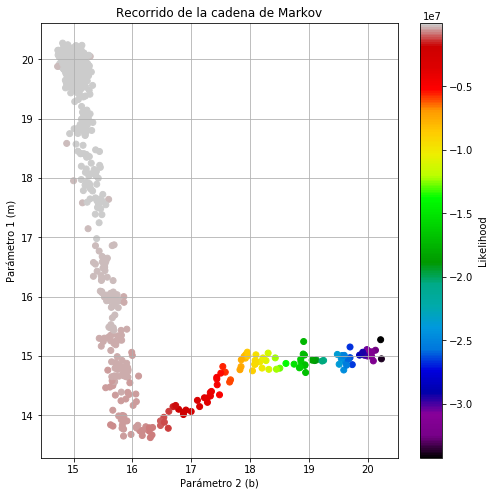

In [14]:
cadena=res[0]
cadena=np.array(cadena)

fig,ax=plt.subplots(figsize=(8, 8))
grafica=ax.scatter(cadena[:,0],cadena[:,1],c=cadena[:,2],cmap="nipy_spectral")
ax.set_ylabel('Parámetro 1 (m)')
ax.set_xlabel('Parámetro 2 (b)')
ax.set_title('Recorrido de la cadena de Markov') 
fig.colorbar(grafica, label='Likelihood')
plt.grid()


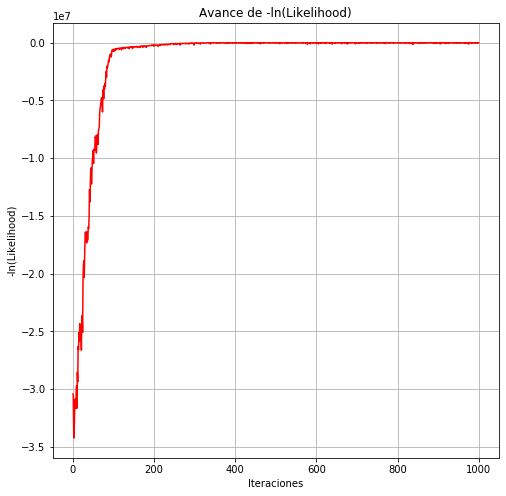

In [7]:
fig,ax=plt.subplots(figsize=(8, 8))
grafica=ax.plot(range(len(cadena[:,2])),cadena[:,2],c='red')
ax.set_ylabel('-ln(Likelihood)')
ax.set_xlabel('Iteraciones')
ax.set_title('Avance de -ln(Likelihood)') 
plt.grid()
